# Read image from csv file

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import scipy.misc
import struct
import os

rows = 50
cols = 50
data_type = "int16"

# Run executable in visual studio and plot image

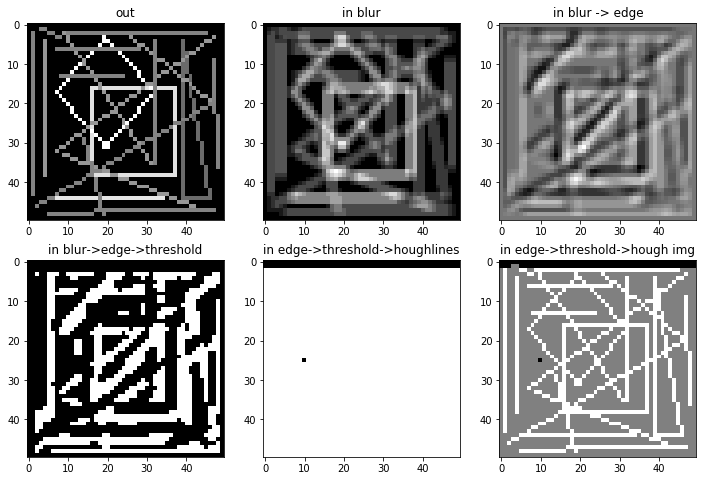

In [2]:
baseDir = "./zybo/build/Debug/"
data_type = "int16"
struct_type = "@H"

#data = np.random.rand(50,50)
#data = scipy.misc.ascent()

#data = np.ones((5,10))*np.linspace(1,10,10)
data = cv.imread("./images/mini_shapes.png", cv.IMREAD_GRAYSCALE)

data = np.array(data,dtype=data_type).reshape(-1)

with open("in_file","wb") as f:
    for d in data:
        f.write(struct.pack(struct_type,d))

plt.figure(figsize=(12,8))
ax = plt.subplot(2,3,1)
ax.set_title("out")
plt.imshow(data.reshape(rows,-1),cmap="gray")

import subprocess
programPath = os.path.join(baseDir,"main.exe")
subprocess.call([programPath])

ax = plt.subplot(2,3,2)
ax.set_title("in blur")
inp = np.fromfile("out_file_blur",dtype=data_type)
plt.imshow(inp.reshape(rows,cols),cmap="gray")

ax = plt.subplot(2,3,3)
ax.set_title("in blur -> edge")
inp = np.fromfile("out_file_blur_edge",dtype=data_type)
plt.imshow(inp.reshape(rows,cols),cmap="gray")

ax = plt.subplot(2,3,4)
ax.set_title("in blur->edge->threshold")
inp = np.fromfile("out_file_threshold",dtype=data_type)
plt.imshow(inp.reshape(rows,cols),cmap="gray")

ax = plt.subplot(2,3,5)
ax.set_title("in edge->threshold->houghlines")
inp = np.fromfile("out_file_hough_lines",dtype=data_type)
plt.imshow(inp.reshape(rows,cols),cmap="gray")

ax = plt.subplot(2,3,6)
ax.set_title("in edge->threshold->hough img")
inp = np.fromfile("out_file_hough_img",dtype=data_type)
plt.imshow(inp.reshape(rows,cols),cmap="gray")

# plt.savefig("PC_swtest.pdf")

# Read images from SDK software 

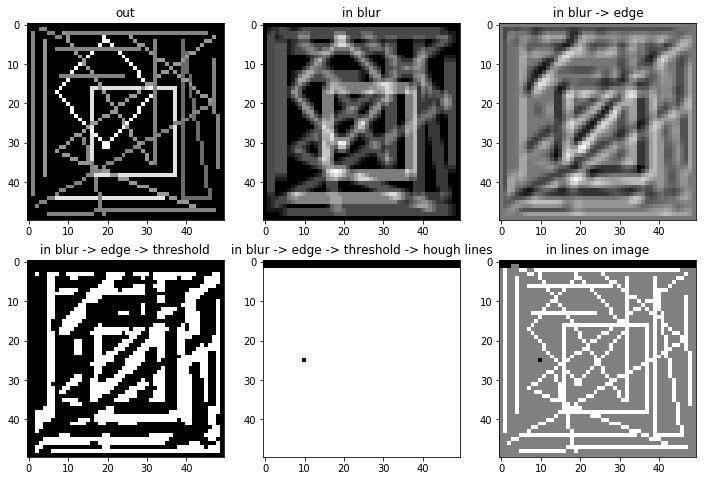

In [5]:

plt.figure(figsize=(12,8))
ax = plt.subplot(2,3,1)
ax.set_title("out")
inp = np.fromfile("./images/INPUT",dtype=data_type)
plt.imshow(inp.reshape(rows,cols),cmap="gray")

ax = plt.subplot(2,3,2)
ax.set_title("in blur")
inp = np.fromfile("./images/OUT_BLUR",dtype=data_type)
plt.imshow(inp.reshape(rows,cols),cmap="gray")

ax = plt.subplot(2,3,3)
ax.set_title("in blur -> edge")
inp = np.fromfile("./images/OUT_EDGE",dtype=data_type)
plt.imshow(inp.reshape(rows,cols),cmap="gray")

ax = plt.subplot(2,3,4)
ax.set_title("in blur -> edge -> threshold")
inp = np.fromfile("./images/OUT_TH",dtype=data_type)
plt.imshow(inp.reshape(rows,cols),cmap="gray")

ax = plt.subplot(2,3,5)
ax.set_title("in blur -> edge -> threshold -> hough lines")
inp = np.fromfile("./images/OUT_LINE",dtype=data_type)
plt.imshow(inp.reshape(rows,cols),cmap="gray")

ax = plt.subplot(2,3,6)
ax.set_title("in lines on image")
inp = np.fromfile("./images/OUT_HIMG",dtype=data_type)
plt.imshow(inp.reshape(rows,cols),cmap="gray")

plt.savefig("ZYBO_swtest.pdf")

# Hardware convolution zybo board

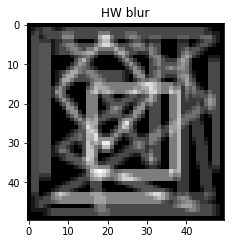

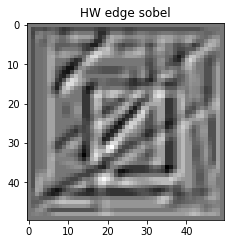

In [3]:
plt.figure(figsize=(12,8))
ax = plt.subplot(1,3,1)
ax.set_title("HW blur")
inp = np.fromfile("./images/HW_BLUR",dtype=data_type)
plt.imshow(inp.reshape(rows,cols),cmap="gray")

plt.figure(figsize=(12,8))
ax = plt.subplot(1,3,1)
ax.set_title("HW edge sobel")
inp = np.fromfile("./images/HW_EDGE",dtype=data_type)
plt.imshow(inp.reshape(rows,cols),cmap="gray")